<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [71]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa
146,4.8,3.0,1.4,0.1,Setosa
147,4.9,3.1,1.5,0.1,Setosa
148,4.9,3.6,1.4,0.1,setosa


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [72]:
data['species'] = data['species'].str.lower()
for i in range(len(data['species'])):
    if pd.isna(data['species'][i]):
        data.at[i, 'species'] = 'default'

len(data['species']) #conteo
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

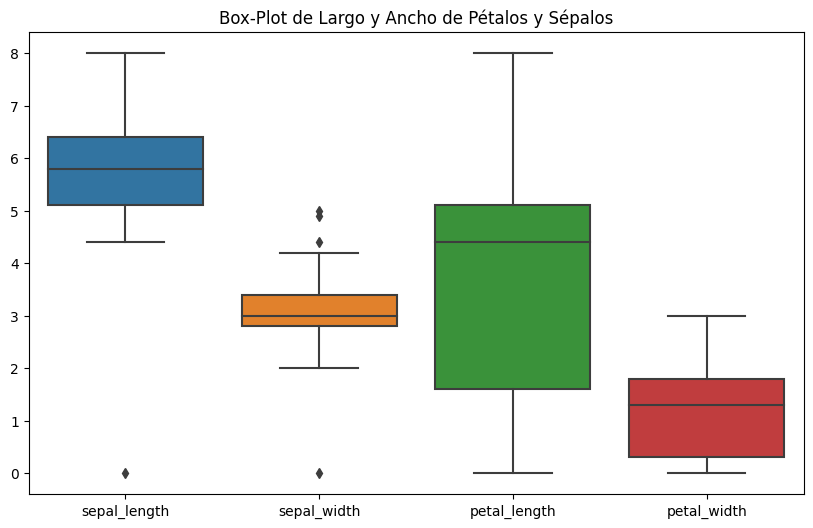

In [73]:
data.fillna(0, inplace=True)
data_anchoylargo = data.drop('species', axis = 1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_anchoylargo)
plt.title("Box-Plot de Largo y Ancho de Pétalos y Sépalos")
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [78]:
def etiquetar_fila(fila):
    sl_valido = 5 <= fila['sepal_length'] <= 6.5
    sw_valido = 2.8 <= fila['sepal_width'] <= 3.2
    pl_valido = 1.5 <= fila['petal_length'] <= 5.1
    pw_valido = 0.2 <= fila['petal_width'] <= 1.8

    if sl_valido and sw_valido and pl_valido and pw_valido:
        return 'all_in_range'
    else:
        etiquetas = []
        if not sl_valido:
            etiquetas.append('sl_oor')
        if not sw_valido:
            etiquetas.append('sw_oor')
        if not pl_valido:
            etiquetas.append('pl_oor')
        if not pw_valido:
            etiquetas.append('pw_oor')

        return ', '.join(etiquetas)

data['label'] = data.apply(etiquetar_fila, axis=1)
data

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,"sl_oor, pl_oor, pw_oor"
1,7.2,3.6,6.1,2.5,virginica,"sl_oor, sw_oor, pl_oor, pw_oor"
2,6.3,3.3,6.0,2.5,virginica,"sw_oor, pl_oor, pw_oor"
3,6.7,3.3,5.7,2.5,virginica,"sl_oor, sw_oor, pl_oor, pw_oor"
4,6.3,3.4,5.6,2.4,virginica,"sw_oor, pl_oor, pw_oor"
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,"pl_oor, pw_oor"
146,4.8,3.0,1.4,0.1,setosa,"sl_oor, pl_oor, pw_oor"
147,4.9,3.1,1.5,0.1,setosa,"sl_oor, pw_oor"
148,4.9,3.6,1.4,0.1,setosa,"sl_oor, sw_oor, pl_oor, pw_oor"


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

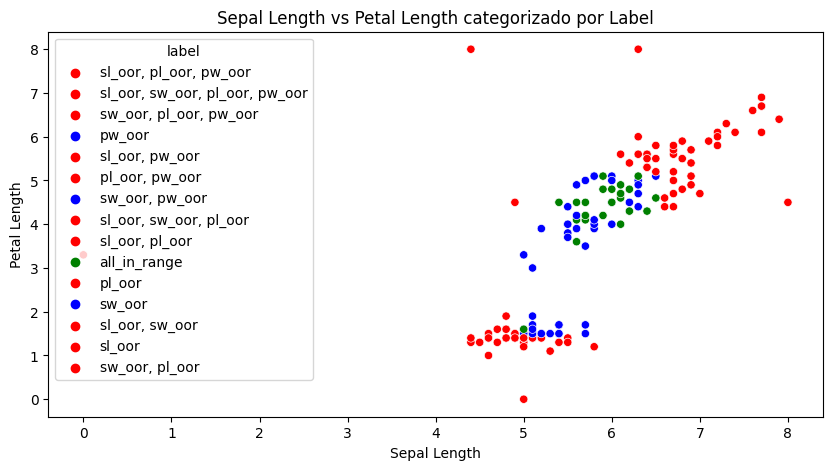

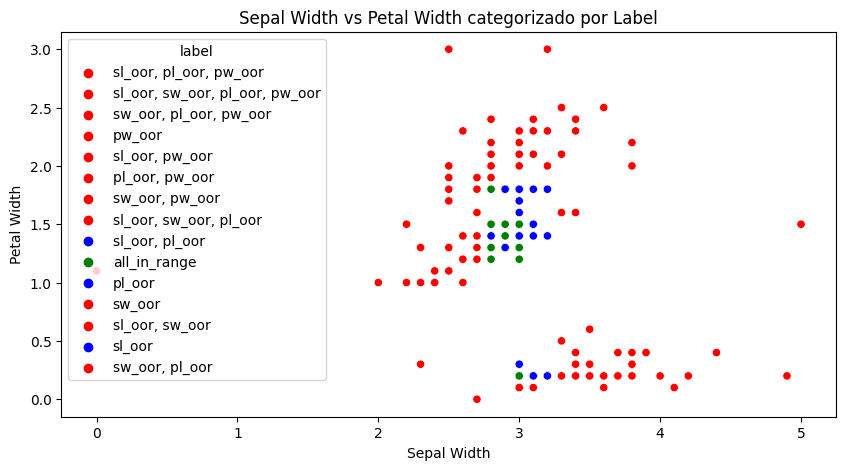

In [85]:
# Gráfico sepal_length vs petal_length
plt.figure(figsize=(10, 5))
palette = {'all_in_range': 'green', 'pl_oor': 'red','sl_oor': 'red', 'sw_oor, pl_oor, pw_oor': 'red', 'sl_oor, sw_oor': 'red', 'sl_oor, pl_oor': 'red', 'sl_oor, pl_oor, pw_oor': 'red', 'sl_oor, sw_oor, pl_oor': 'red', 'sl_oor, sw_oor, pl_oor, pw_oor': 'red', 'sw_oor, pw_oor' : 'blue', 'sw_oor' : 'blue', 'sl_oor, pw_oor': 'red', 'pl_oor, pw_oor': 'red', 'pw_oor' : 'blue', 'sw_oor, pl_oor': 'red'}
sns.scatterplot(data=data, x='sepal_length', y='petal_length', hue='label', palette = palette)
plt.title('Sepal Length vs Petal Length categorizado por Label')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

# Gráfico sepal_width vs petal_width
plt.figure(figsize=(10, 5))
palette = {'all_in_range': 'green', 'pl_oor': 'blue','sl_oor': 'blue', 'sw_oor, pl_oor, pw_oor': 'red', 'sl_oor, sw_oor': 'red', 'sl_oor, pl_oor': 'blue', 'sl_oor, pl_oor, pw_oor': 'red', 'sl_oor, sw_oor, pl_oor': 'red', 'sl_oor, sw_oor, pl_oor, pw_oor': 'red', 'sw_oor, pw_oor' : 'red', 'sw_oor' : 'red', 'sl_oor, pw_oor': 'red', 'pl_oor, pw_oor': 'red', 'pw_oor' : 'red', 'sw_oor, pl_oor': 'red'}
sns.scatterplot(data=data, x='sepal_width', y='petal_width', hue='label',palette = palette)
plt.title('Sepal Width vs Petal Width categorizado por Label')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.





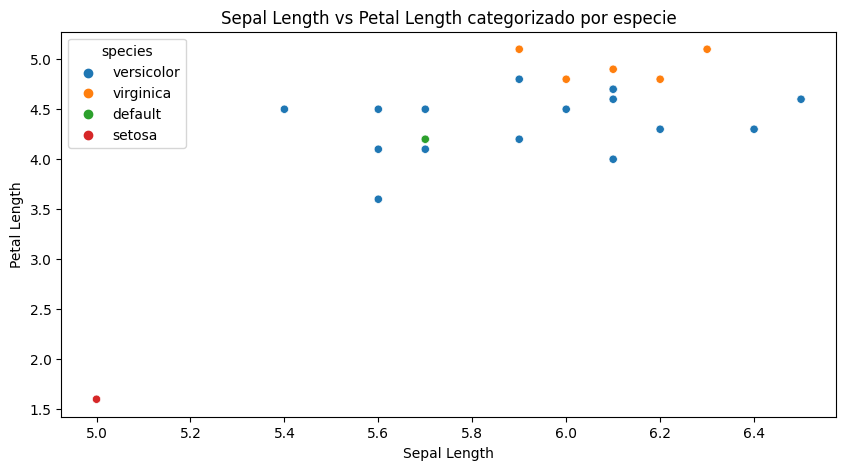

In [89]:
mascara = data['label'] == 'all_in_range'
resultados = data[mascara]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=resultados, x='sepal_length', y='petal_length', hue='species')
plt.title('Sepal Length vs Petal Length categorizado por especie|')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()